<a href="https://colab.research.google.com/github/Heimeinsheu/software_defects_phase1/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intialization


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
from copy import deepcopy


from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kc2_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/softwareDefect.csv")
jm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/jm1.csv")
ar1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar1.csv")
ar3_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar3.csv")
ar4_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar4.csv")
ar5_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar5.csv")
ar6_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar6.csv")
kc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/kc1.csv")
cm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/cm1.csv")
pc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/pc1.csv")

In [ ]:
# adding column name to the respective columns
kc2_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
kc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
cm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
pc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
jm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
ar1_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar3_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar4_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar5_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar6_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']


In [ ]:
jm1_df.drop(jm1_df.loc[jm1_df['uniq_Op']=="?"].index, inplace=True)
kc2_df['problems'] = kc2_df['problems'].map({'yes':True ,'no':False})

In [ ]:
x_kc2 = kc2_df.iloc[:,:-1]
y_kc2 = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_kc2,y_kc2,test_size=0.20,random_state=0)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import keras

In [ ]:
print(kc1_df.dtypes)

l_count                    int64
cyclomatic_complexity      int64
essential_complexity       int64
design_complexity          int64
n                          int64
v                        float64
l                        float64
d                        float64
i                        float64
e                        float64
b                        float64
t                        float64
lOCode                     int64
lOComment                  int64
lOBlank                    int64
lOCodeAndComment           int64
uniq_Op                    int64
uniq_Opnd                  int64
total_Op                   int64
total_Opnd                 int64
branchCount                int64
problems                    bool
dtype: object


In [ ]:
kc2_df

,l_count,cyclomatic_complexity,essential_complexity,design_complexity,n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,problems
0,1,1.0,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,415,59.0,50,51,1159,8411.31,0.01,103.53,81.24,870848.58,...,359,35,9,10,47,106,692,467,106,True
2,230,33.0,10,16,575,3732.82,0.03,39.82,93.74,148644.06,...,174,15,34,5,23,67,343,232,65,True
3,175,26.0,12,13,500,3123.96,0.03,29.48,105.96,92103.07,...,142,7,19,4,18,58,310,190,51,True
4,163,16.0,13,11,440,2714.77,0.03,32.25,84.14,87589.65,...,139,2,20,0,19,53,260,180,31,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,4,1.0,1,1,5,11.61,0.50,2.00,5.80,23.22,...,2,0,0,0,4,1,4,1,1,True
517,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
518,4,1.0,1,1,4,8.00,0.67,1.50,5.33,12.00,...,2,0,0,0,3,1,3,1,1,True
519,4,1.0,1,1,5,11.61,0.67,1.50,7.74,17.41,...,2,0,0,0,3,2,3,2,1,True


##Single Layer Feed Forward Neural Network

In [ ]:
x = kc2_df.iloc[:,:-1]
y = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(416, 21)

In [ ]:
x_train=x_train/416
x_test=x_test/416

In [ ]:
x_train=x_train.to_numpy()

In [ ]:
x_train.shape

(416, 21)

In [ ]:
x_train

array([[0.13461538, 0.01682692, 0.00721154, ..., 0.20673077, 0.13221154,
        0.03125   ],
       [0.11057692, 0.02163462, 0.01442308, ..., 0.19230769, 0.125     ,
        0.04086538],
       [0.01442308, 0.00240385, 0.00240385, ..., 0.02163462, 0.00480769,
        0.00240385],
       ...,
       [0.01923077, 0.00240385, 0.00240385, ..., 0.01201923, 0.01201923,
        0.00240385],
       [0.25961538, 0.02644231, 0.00240385, ..., 0.41346154, 0.28125   ,
        0.05048077],
       [0.01442308, 0.00240385, 0.00240385, ..., 0.01923077, 0.01682692,
        0.00240385]])

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(2,input_dim=21))
model.add(keras.layers.Activation('softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 1s 5ms/step - loss: 4.1523 - accuracy: 0.3726
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.8745 - accuracy: 0.4928
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.6101 - accuracy: 0.5529
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 3.3384 - accuracy: 0.5865
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 3.0846 - accuracy: 0.5962
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 2.8616 - accuracy: 0.6034
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 2.5816 - accuracy: 0.6274
Epoch 8/1000
13/13 [==============================] - 0s 6ms/step - loss: 2.3395 - accuracy: 0.6514
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 2.0998 - accuracy: 0.6635
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 1.8756 - accuracy: 0.6827

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.5671 - accuracy: 0.8476


[0.5671034455299377, 0.8476190567016602]

In [ ]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
prediction[0]

array([0.93735313, 0.06264681], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
prediction_label[:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = list(map(bool,prediction_label))

In [ ]:
y_pred[:9]

[False, False, False, False, False, False, False, False, False]

In [ ]:
y_test[:9]

157    False
137    False
263    False
45     False
108    False
46     False
15     False
236    False
233    False
Name: problems, dtype: bool

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[80,  4],
       [12,  9]], dtype=int32)>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics


In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  80 
False positives:  4 
False negatives:  12 
True Positives:  9


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8476190476190476


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.91        84
        True       0.69      0.43      0.53        21

    accuracy                           0.85       105
   macro avg       0.78      0.69      0.72       105
weighted avg       0.83      0.85      0.83       105



Text(95.72222222222221, 0.5, 'Truth')

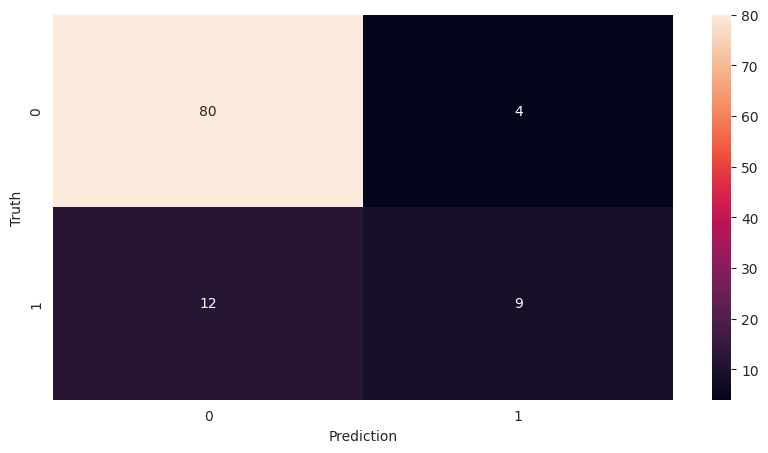

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

##Simple Perceptron

###Using Step up fucntion

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from copy import deepcopy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import keras

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kc2_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/softwareDefect.csv")
jm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/jm1.csv")
ar1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar1.csv")
ar3_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar3.csv")
ar4_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar4.csv")
ar5_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar5.csv")
ar6_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar6.csv")
kc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/kc1.csv")
cm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/cm1.csv")
pc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/pc1.csv")

In [ ]:
# adding column name to the respective columns
kc2_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
kc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
cm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
pc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
jm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
ar1_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar3_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar4_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar5_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar6_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']


In [ ]:
jm1_df.drop(jm1_df.loc[jm1_df['uniq_Op']=="?"].index, inplace=True)
kc2_df['problems'] = kc2_df['problems'].map({'yes':True ,'no':False})

In [ ]:
x = kc2_df.iloc[:,:-1]
y = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [ ]:
X_train.shape

(416, 21)

In [ ]:
X_train=X_train/416
X_test=X_test/416

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
X_train.shape

(416, 21)

In [ ]:
X_test = X_test.to_numpy()
y_train =  y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_test.shape


(105, 21)

In [ ]:
y_train.shape


(416,)

In [ ]:
y_test.shape

(105,)

In [ ]:
type(X_train)
type(X_test)
type(y_train)
type(y_test)

numpy.ndarray

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np


def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
  
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    prediction = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, prediction))

   
    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]


    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
  


Perceptron classification accuracy 0.8095238095238095


In [ ]:
prediction

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = prediction)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[71, 17],
       [ 3, 14]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  71 
False positives:  17 
False negatives:  3 
True Positives:  14


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, prediction)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8095238095238095


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       0.96      0.81      0.88        88
        True       0.45      0.82      0.58        17

    accuracy                           0.81       105
   macro avg       0.71      0.82      0.73       105
weighted avg       0.88      0.81      0.83       105



###Using softmax function

In [ ]:
import numpy as np


def softmax(x):
    """ applies softmax to an input x"""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = softmax
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
  
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    prediction = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, prediction))

    X_train[X_train != 0]
   
    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]


    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
  


Perceptron classification accuracy 0.7619047619047619


In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
print("Perceptron classification accuracy", accuracy(y_test, prediction_label))

Perceptron classification accuracy 0.8380952380952381


In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = prediction)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[88,  0],
       [17,  0]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,prediction_label).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  88 
False positives:  0 
False negatives:  17 
True Positives:  0


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, prediction_label)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8380952380952381


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_label))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91        88
        True       0.00      0.00      0.00        17

    accuracy                           0.84       105
   macro avg       0.42      0.50      0.46       105
weighted avg       0.70      0.84      0.76       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Using Sigmoid function

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from copy import deepcopy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import keras

from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kc2_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/softwareDefect.csv")
jm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/jm1.csv")
ar1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar1.csv")
ar3_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar3.csv")
ar4_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar4.csv")
ar5_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar5.csv")
ar6_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/ar6.csv")
kc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/kc1.csv")
cm1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/cm1.csv")
pc1_df=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Dissertation/pc1.csv")

In [ ]:
# adding column name to the respective columns
kc2_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
kc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
cm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
pc1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
jm1_df.columns =['l_count', 'cyclomatic_complexity', 'essential_complexity', 'design_complexity','n','v','l','d','i','e','b','t','lOCode','lOComment','lOBlank','lOCodeAndComment','uniq_Op','uniq_Opnd','total_Op','total_Opnd','branchCount','problems']
ar1_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar3_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar4_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar5_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']
ar6_df.columns=['total_loc','blank_loc','comment_loc','code_and_comment_loc','executable_loc','unique_operands','unique_operators','total_operands','total_operators','halstead_vocabulary','halstead_length','halstead_volume','halstead_level','halstead_difficulty','halstead_effort','halstead_error','halstead_time','branch_count','decision_count','call_pairs','condition_count','multiple_condition_count','cyclomatic_complexity','cyclomatic_density','decision_density','design_complexity','design_density','normalized_cyclomatic_complexity','formal_parameters','problems']


In [ ]:
jm1_df.drop(jm1_df.loc[jm1_df['uniq_Op']=="?"].index, inplace=True)
kc2_df['problems'] = kc2_df['problems'].map({'yes':True ,'no':False})

In [ ]:
x = kc2_df.iloc[:,:-1]
y = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [ ]:
X_train.shape

(416, 21)

In [ ]:
X_train=X_train/416
X_test=X_test/416

In [ ]:
X_train = X_train.to_numpy()

In [ ]:
X_train.shape

(416, 21)

In [ ]:
X_test = X_test.to_numpy()
y_train =  y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_test.shape


(105, 21)

In [ ]:
y_train.shape


(416,)

In [ ]:
y_test.shape

(105,)

In [ ]:
type(X_train)
type(X_test)
type(y_train)
type(y_test)

numpy.ndarray

In [ ]:
import numpy as np

def sig(x):
 return 1/(1 + np.exp(-x))


class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = sig
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
  
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    prediction = p.predict(X_test)

    print("Perceptron classification accuracy", accuracy(y_test, prediction))

    X_train[X_train != 0]
   
    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]


    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
  


Perceptron classification accuracy 0.047619047619047616


In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
prediction

array([0.99472863, 0.06129104, 0.05632374, 0.07200392, 1.        ,
       0.06229481, 0.0685681 , 1.        , 0.20805066, 0.05952047,
       0.06852017, 1.        , 0.06774574, 0.11101339, 0.06897558,
       0.31272417, 0.9966043 , 0.06852017, 0.05524937, 1.        ,
       0.07200392, 1.        , 0.08726029, 0.06118143, 0.83819713,
       0.06299768, 0.99999976, 0.06852017, 0.05970757, 1.        ,
       1.        , 0.06356124, 1.        , 1.        , 0.05443918,
       0.84428395, 0.37250463, 0.06852017, 0.06774574, 0.0706514 ,
       0.99999997, 0.06852017, 0.21260168, 0.06320868, 0.06802288,
       0.97593683, 0.06852017, 0.37409647, 0.06118143, 0.99999997,
       0.07688257, 0.99999762, 0.114358  , 0.99999907, 0.0545238 ,
       0.0610185 , 0.84111046, 0.99857246, 0.08372155, 0.07200392,
       0.07208695, 0.11448533, 0.17280659, 0.07558272, 0.78051363,
       0.09831084, 0.06451007, 0.15461964, 0.99575555, 1.        ,
       0.14978137, 0.99995068, 1.        , 0.07216708, 0.05470

In [ ]:
print("Perceptron classification accuracy", accuracy(y_test, prediction_label))

Perceptron classification accuracy 0.8380952380952381


In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = prediction)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[87,  1],
       [12,  5]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,prediction_label).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  88 
False positives:  0 
False negatives:  17 
True Positives:  0


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, prediction_label)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8380952380952381


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_label))

              precision    recall  f1-score   support

       False       0.84      1.00      0.91        88
        True       0.00      0.00      0.00        17

    accuracy                           0.84       105
   macro avg       0.42      0.50      0.46       105
weighted avg       0.70      0.84      0.76       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Multiayer Neuron Network

In [ ]:
x = kc2_df.iloc[:,:-1]
y = kc2_df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
x_train.shape

(416, 21)

In [ ]:
x_train=x_train/416
x_test=x_test/416

In [ ]:
x_train=x_train.to_numpy()

In [ ]:
x_train.shape

(416, 21)

In [ ]:
x_train

array([[0.13461538, 0.01682692, 0.00721154, ..., 0.20673077, 0.13221154,
        0.03125   ],
       [0.11057692, 0.02163462, 0.01442308, ..., 0.19230769, 0.125     ,
        0.04086538],
       [0.01442308, 0.00240385, 0.00240385, ..., 0.02163462, 0.00480769,
        0.00240385],
       ...,
       [0.01923077, 0.00240385, 0.00240385, ..., 0.01201923, 0.01201923,
        0.00240385],
       [0.25961538, 0.02644231, 0.00240385, ..., 0.41346154, 0.28125   ,
        0.05048077],
       [0.01442308, 0.00240385, 0.00240385, ..., 0.01923077, 0.01682692,
        0.00240385]])

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_dim=21),
    keras.layers.Dense(42,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid"),
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
13/13 [==============================] - 1s 2ms/step - loss: 2.8142 - accuracy: 0.7909
Epoch 2/5
13/13 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.7139
Epoch 3/5
13/13 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.7861
Epoch 4/5
13/13 [==============================] - 0s 2ms/step - loss: 0.5644 - accuracy: 0.8173
Epoch 5/5
13/13 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.8173


In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.8571


[0.442794531583786, 0.8571428656578064]

In [ ]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [ ]:
prediction[0]

array([0.61281735, 0.38331404], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
prediction_label[:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = list(map(bool,prediction_label))

In [ ]:
y_pred[:9]

[False, False, False, False, False, False, False, False, False]

In [ ]:
y_test[:9]

157    False
137    False
263    False
45     False
108    False
46     False
15     False
236    False
233    False
Name: problems, dtype: bool

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[78,  6],
       [16,  5]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  78 
False positives:  6 
False negatives:  16 
True Positives:  5


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7904761904761904


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.93      0.88        84
        True       0.45      0.24      0.31        21

    accuracy                           0.79       105
   macro avg       0.64      0.58      0.59       105
weighted avg       0.75      0.79      0.76       105



Text(95.72222222222221, 0.5, 'Truth')

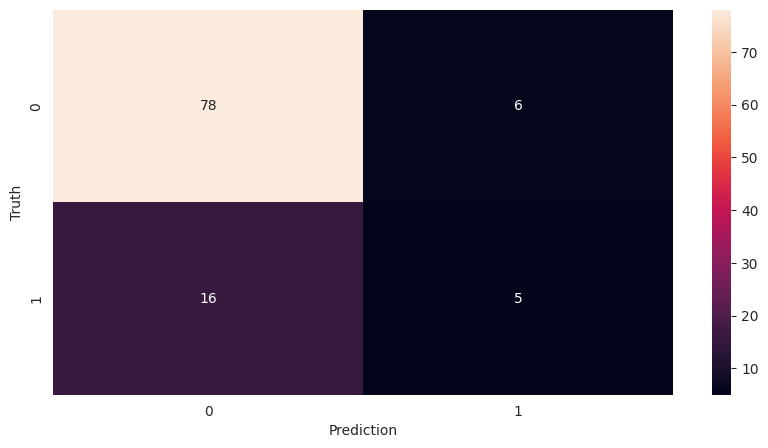

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

##Multilayer 2

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_dim=21),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(19,activation="relu"),
    keras.layers.Dense(18,activation="relu"),
    keras.layers.Dense(17,activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(13,activation="relu"),
    keras.layers.Dense(12,activation="relu"),
    keras.layers.Dense(11,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(9,activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(7,activation="relu"),
    keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(3,activation="relu"),
    keras.layers.Dense(2,activation="softmax"),

])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 4s 6ms/step - loss: 0.6817 - accuracy: 0.7933
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.7933
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6189 - accuracy: 0.7933
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.5611 - accuracy: 0.7933
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.7933
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4085 - accuracy: 0.7933
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.7933
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3988 - accuracy: 0.7933
Epoch 9/1000
13/13 [==============================] - 0s 6ms/step - loss: 0.4002 - accuracy: 0.7933
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.3957 - accuracy: 0.7933

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.8017 - accuracy: 0.7619


[0.8017081618309021, 0.761904776096344]

In [ ]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
prediction[0]

array([0.9963618 , 0.00363825], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
prediction_label[:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = list(map(bool,prediction_label))

In [ ]:
y_pred[:9]

[False, False, False, False, False, False, False, False, False]

In [ ]:
y_test[:9]

157    False
137    False
263    False
45     False
108    False
46     False
15     False
236    False
233    False
Name: problems, dtype: bool

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[70, 14],
       [11, 10]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  70 
False positives:  14 
False negatives:  11 
True Positives:  10


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.7619047619047619


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.83      0.85        84
        True       0.42      0.48      0.44        21

    accuracy                           0.76       105
   macro avg       0.64      0.65      0.65       105
weighted avg       0.77      0.76      0.77       105



Text(95.72222222222221, 0.5, 'Truth')

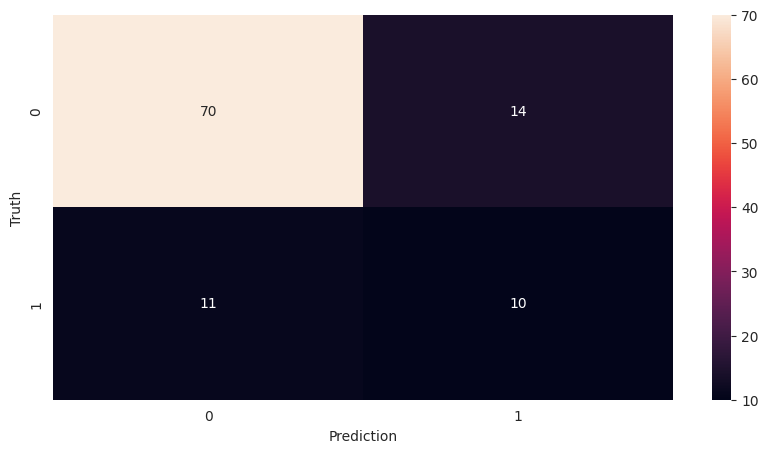

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

##3multilayer

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_dim=21),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(19,activation="relu"),
    keras.layers.Dense(18,activation="relu"),
    keras.layers.Dense(17,activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(13,activation="relu"),
    keras.layers.Dense(12,activation="relu"),
    keras.layers.Dense(11,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(9,activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(7,activation="relu"),
    keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(3,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid"),

])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 4s 5ms/step - loss: 0.6893 - accuracy: 0.7644
Epoch 2/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.8221
Epoch 3/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6728 - accuracy: 0.8293
Epoch 4/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6642 - accuracy: 0.8197
Epoch 5/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.8269
Epoch 6/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.8245
Epoch 7/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6417 - accuracy: 0.8221
Epoch 8/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6364 - accuracy: 0.8317
Epoch 9/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6293 - accuracy: 0.8221
Epoch 10/1000
13/13 [==============================] - 0s 5ms/step - loss: 0.6233 - accuracy: 0.8317

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.5256 - accuracy: 0.8571


[0.525606632232666, 0.8571428656578064]

In [ ]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
prediction[0]

array([0.9322115 , 0.31235176], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
prediction_label[:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = list(map(bool,prediction_label))

In [ ]:
y_pred[:9]

[False, False, False, False, False, False, False, False, False]

In [ ]:
y_test[:9]

157    False
137    False
263    False
45     False
108    False
46     False
15     False
236    False
233    False
Name: problems, dtype: bool

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[79,  5],
       [10, 11]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  79 
False positives:  5 
False negatives:  10 
True Positives:  11


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8571428571428571


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.94      0.91        84
        True       0.69      0.52      0.59        21

    accuracy                           0.86       105
   macro avg       0.79      0.73      0.75       105
weighted avg       0.85      0.86      0.85       105



Text(95.72222222222221, 0.5, 'Truth')

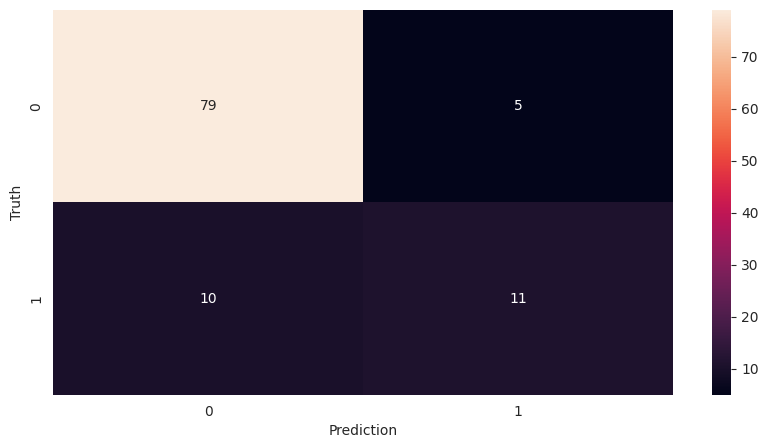

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_dim=21),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(19,activation="relu"),
    keras.layers.Dense(18,activation="relu"),
    keras.layers.Dense(17,activation="relu"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(13,activation="relu"),
    keras.layers.Dense(12,activation="relu"),
    keras.layers.Dense(11,activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(9,activation="relu"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(7,activation="relu"),
    keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(3,activation="relu"),
    keras.layers.Dense(2,activation="relu"),

])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7933
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.7933

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.8000


[0.6931471824645996, 0.800000011920929]

In [ ]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
prediction[0]

array([0., 0.], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
prediction_label[:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = list(map(bool,prediction_label))

In [ ]:
y_pred[:9]

[False, False, False, False, False, False, False, False, False]

In [ ]:
y_test[:9]

157    False
137    False
263    False
45     False
108    False
46     False
15     False
236    False
233    False
Name: problems, dtype: bool

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[84,  0],
       [21,  0]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  84 
False positives:  0 
False negatives:  21 
True Positives:  0


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      1.00      0.89        84
        True       0.00      0.00      0.00        21

    accuracy                           0.80       105
   macro avg       0.40      0.50      0.44       105
weighted avg       0.64      0.80      0.71       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

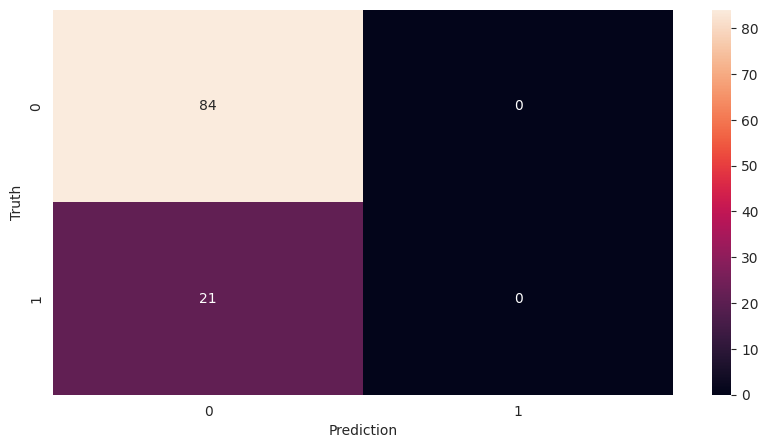

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_dim=21),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(19,activation="sigmoid"),
    keras.layers.Dense(18,activation="relu"),
    keras.layers.Dense(17,activation="sigmoid"),
    keras.layers.Dense(16,activation="relu"),
    keras.layers.Dense(15,activation="sigmoid"),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(13,activation="sigmoid"),
    keras.layers.Dense(12,activation="relu"),
    keras.layers.Dense(11,activation="sigmoid"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(9,activation="sigmoid"),
    keras.layers.Dense(8,activation="relu"),
    keras.layers.Dense(7,activation="sigmoid"),
    keras.layers.Dense(6,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid"),
    keras.layers.Dense(4,activation="relu"),
    keras.layers.Dense(3,activation="sigmoid"),
    keras.layers.Dense(2,activation="softmax"),

])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
13/13 [==============================] - 3s 3ms/step - loss: 0.7774 - accuracy: 0.2067
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7470 - accuracy: 0.2067
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.2067
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5337
Epoch 5/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.7933
Epoch 6/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6453 - accuracy: 0.7933
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.7933
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.6068 - accuracy: 0.7933
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7933
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7933

In [ ]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8000


[0.3954816460609436, 0.800000011920929]

In [ ]:
prediction = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
prediction[0]

array([0.9399321, 0.0600678], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

In [ ]:
prediction_label=[np.argmax(i) for i in prediction]

In [ ]:
prediction_label[:9]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = list(map(bool,prediction_label))

In [ ]:
y_pred[:9]

[False, False, False, False, False, False, False, False, False]

In [ ]:
y_test[:9]

157    False
137    False
263    False
45     False
108    False
46     False
15     False
236    False
233    False
Name: problems, dtype: bool

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[84,  0],
       [21,  0]], dtype=int32)>

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)


True negatives:  84 
False positives:  0 
False negatives:  21 
True Positives:  0


In [ ]:
from sklearn.metrics import accuracy_score
score_ = accuracy_score(y_test, y_pred)
print("Test Accuracy Score: ", score_)

Test Accuracy Score:  0.8


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      1.00      0.89        84
        True       0.00      0.00      0.00        21

    accuracy                           0.80       105
   macro avg       0.40      0.50      0.44       105
weighted avg       0.64      0.80      0.71       105



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

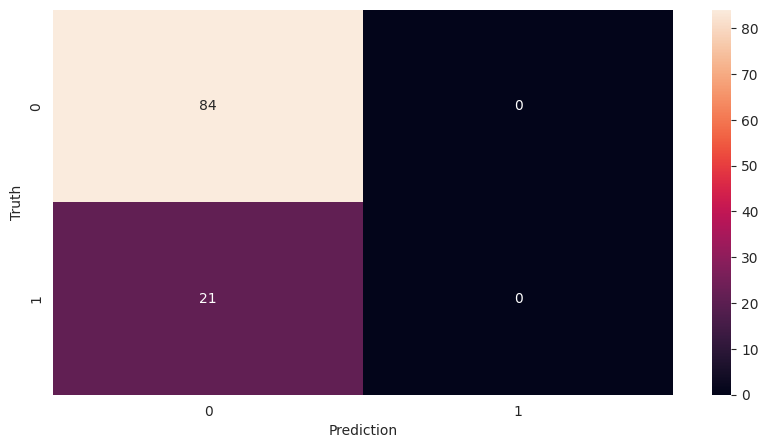

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")